In [5]:
!pip install ngsolve-webgui


ERROR: Could not find a version that satisfies the requirement ngsolve-webgui (from versions: none)
ERROR: No matching distribution found for ngsolve-webgui


1.1 2

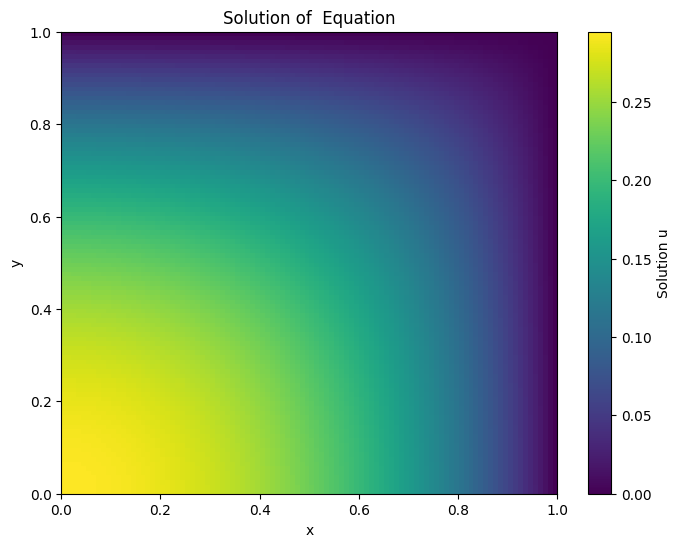

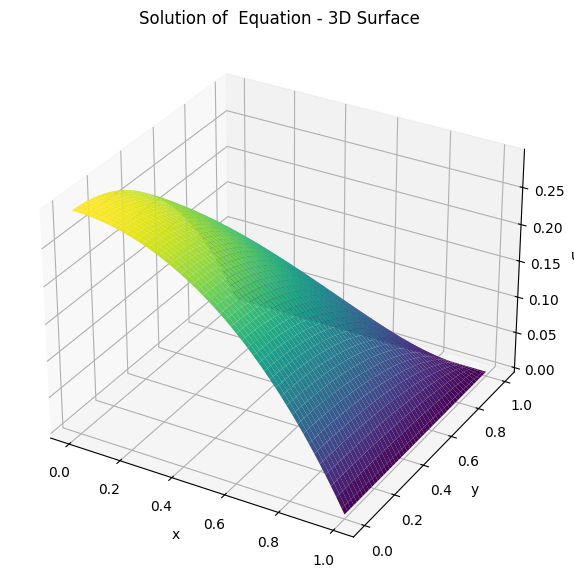

In [ ]:
# Import necessary modules
from ngsolve import *
from netgen.geom2d import unit_square
import matplotlib.pyplot as plt
import numpy as np

# Generate the unit square mesh
mesh = Mesh(unit_square.GenerateMesh(maxh=0.1))

# Define finite element space
fes = H1(mesh, order=2, dirichlet="top|right")  # Dirichlet on top (y=1) and right (x=1)

# Define the solution and test functions
u = fes.TrialFunction()
v = fes.TestFunction()

# Bilinear and linear forms
a = BilinearForm(fes)
a += grad(u) * grad(v) * dx  # ∇u · ∇v

f = LinearForm(fes)
f += v * dx  # Right-hand side

# Assemble the forms
a.Assemble()
f.Assemble()

# Solve the linear system
u_sol = GridFunction(fes)  # Solution function
u_sol.vec.data = a.mat.Inverse(fes.FreeDofs()) * f.vec

# Visualization using matplotlib

# Create a grid of points over the domain
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the solution at the grid points
Z = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        Z[j, i] = u_sol(x[i], y[j])

# Plot the solution using imshow
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[0, 1, 0, 1], origin="lower", cmap="viridis", aspect="auto")
plt.colorbar(label="Solution u")
plt.title("Solution of  Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Alternatively, plot the surface in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u")
ax.set_title("Solution of  Equation - 3D Surface")
plt.show()

3 and 4

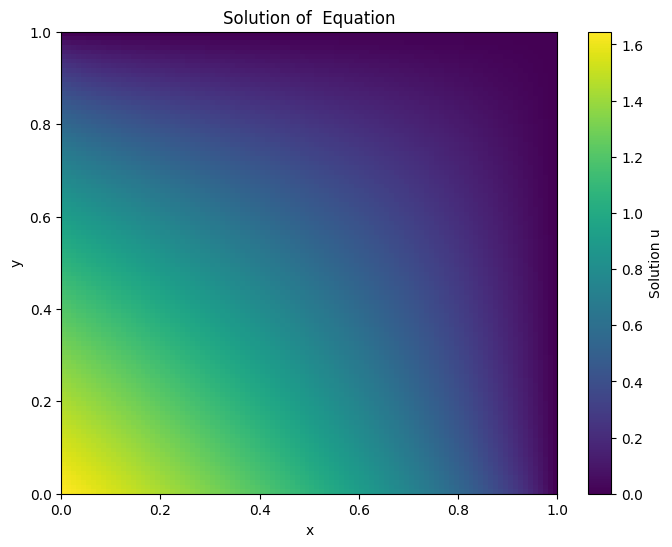

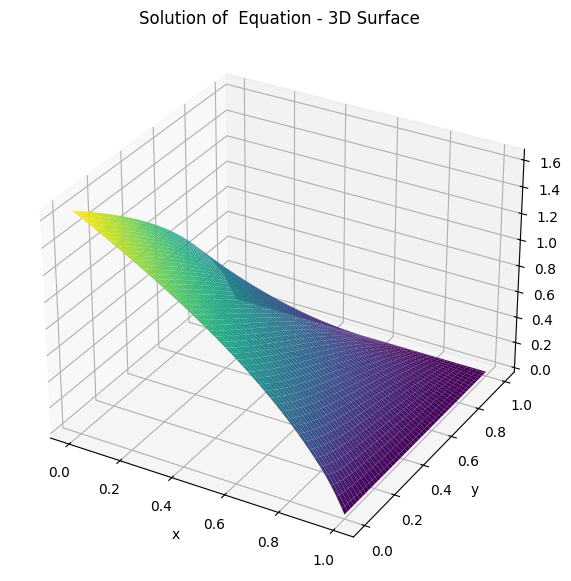

In [4]:
# Import necessary modules
from ngsolve import *
from netgen.geom2d import unit_square
import matplotlib.pyplot as plt
import numpy as np

# Generate the unit square mesh
mesh = Mesh(unit_square.GenerateMesh(maxh=0.1))

# Define finite element space
fes = H1(mesh, order=2, dirichlet="top|right")  # Dirichlet on top (y=1) and right (x=1)

# Define the solution and test functions
u = fes.TrialFunction()
v = fes.TestFunction()

# Bilinear and linear forms
a = BilinearForm(fes)
a += grad(u) * grad(v) * dx  # ∇u · ∇v

# Linear form with the new boundary condition
f = LinearForm(fes)
f += v * dx  # Right-hand side (volume integral)
f += v * ds("left|bottom")  # Neumann boundary condition on left and bottom

# Assemble the forms
a.Assemble()
f.Assemble()

# Solve the linear system
u_sol = GridFunction(fes)  # Solution function
u_sol.vec.data = a.mat.Inverse(fes.FreeDofs()) * f.vec

# Visualization using matplotlib

# Create a grid of points over the domain
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the solution at the grid points
Z = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        Z[j, i] = u_sol(x[i], y[j])

# Plot the solution using imshow
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[0, 1, 0, 1], origin="lower", cmap="viridis", aspect="auto")
plt.colorbar(label="Solution u")
plt.title("Solution of  Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Alternatively, plot the surface in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u")
ax.set_title("Solution of  Equation - 3D Surface")
plt.show()

aufgabe 2.2
